In [47]:
#load data
import pandas as pd
import psycopg2
conn_string = "dbname='igor' user='server' password='Chordify2811' host='138.197.179.83'"
conn = psycopg2.connect(conn_string)
cur = conn.cursor()
cur.execute("SELECT id FROM pairs_ts ORDER BY id DESC LIMIT 1;")
idt = cur.fetchone()
cur.execute("SELECT fex, sex, br, fvalue, svalue, delta FROM pairs WHERE idt=%s", idt)
data = cur.fetchall()
cur.close()
conn.close()
data = pd.DataFrame(data)
data.columns = ['from', 'to', 'cryptocurrency', 'from_price', 'to_price', 'delta']
data.head(2)

,from,to,cryptocurrency,from_price,to_price,delta
0,pol,cex,bch_btc,0.15409486,0.1540805,0.99
1,pol,cex,bch_usd,1741.3959179982094,1907.9977,1.09


In [48]:
#create new columns for nodes
dat1 = data[['from', 'to', 'cryptocurrency', 'delta']]
#dat1['node1'] = dat1['from']+dat1['cryptocurrency']
a1 = list(dat1['from'].values)
a2 = list(dat1['to'].values)
a3 = list(dat1['cryptocurrency'].values)
node1 = []
node2 = []
for i in range(0, len(a1)):
    b = "_"
    node1.append(a1[i] + b +a3[i])
    node2.append(a2[i] + b + a3[i])
dat1['node1'] = node1
dat1['node2'] = node2
dat1.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,from,to,cryptocurrency,delta,node1,node2
0,pol,cex,bch_btc,0.99,pol_bch_btc,cex_bch_btc
1,pol,cex,bch_usd,1.09,pol_bch_usd,cex_bch_usd


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

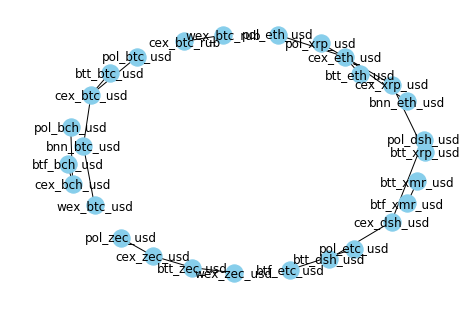

[('pol_bch_usd', 1),
 ('pol_btc_usd', 1),
 ('pol_dsh_usd', 1),
 ('pol_eth_usd', 1),
 ('pol_zec_usd', 1),
 ('pol_xrp_usd', 1),
 ('pol_etc_usd', 1),
 ('btf_etc_usd', 1),
 ('btt_btc_usd', 1),
 ('btt_dsh_usd', 1),
 ('btt_eth_usd', 1),
 ('btt_xrp_usd', 1),
 ('btt_xmr_usd', 1),
 ('btf_xmr_usd', 1),
 ('wex_zec_usd', 1),
 ('bnn_eth_usd', 1),
 ('wex_btc_usd', 1),
 ('btf_bch_usd', 1),
 ('wex_btc_rub', 1),
 ('cex_btc_rub', 1),
 ('cex_bch_usd', 2),
 ('cex_dsh_usd', 2),
 ('cex_zec_usd', 2),
 ('cex_xrp_usd', 2),
 ('btt_zec_usd', 2),
 ('bnn_btc_usd', 2),
 ('cex_btc_usd', 3),
 ('cex_eth_usd', 3)]

In [63]:
#plot graph
import matplotlib.pyplot as plt
import networkx as nx
dat1 = dat1[dat1['delta'] >= 1.05]

G=nx.from_pandas_dataframe(dat1, source =  'node1', target='node2', edge_attr= 'delta')
nx.draw(G, with_labels = True, node_color='skyblue')
plt.show()
import operator
sorted_degrees = sorted(nx.degree(G).items(), key=operator.itemgetter(1))
sorted_degrees

